<a href="https://colab.research.google.com/github/solozano0725/diplomadoMLNivel1/blob/main/DipMLsesion13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 13**

## **Contenido**

- <a href="#pre"> Preprocesado: </a><br>
  - <a href="#nan"> Valores nulos/faltantes</a><br>
  - <a href="#nor"> Estandarización, escalamiento y normalización</a><br>
  - <a href="#cat"> Codificación de variables categóricas</a><br>

<p><a name="nan"></a></p>

# **Valores nulos/faltantes**

El manejo de los valores nulos es una tarea de preprocesamiento esencial. Si tengo valores nulos en mi conjunto de datos ¿Cómo se expresan en los datos? ¿Debo mantener las instancias con valores nulos o debería reemplazarlos? En segundo caso, ¿con qué valores deberían reemplazarse?







In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/diplomadomludea/nivel_1/master/data/auto.csv", index_col=[0])
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Para examinar los valores nulos en el conjunto de datos, podemos utilizar el método `isna`:

In [ ]:
df.isna().any()

symboling            False
normalized-losses    False
make                 False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke                True
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
city-L/100km         False
horsepower-binned     True
diesel               False
gas                  False
dtype: bool

Para examinar el número de valores nulos por característica aplicamos la función de agreagación `sum`

In [ ]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

Más que el número de valores nulos, estamos interesados en saber qué porcentaje de los datos son valores nulos

In [ ]:
df.isna().sum()/len(df)

symboling            0.000000
normalized-losses    0.000000
make                 0.000000
aspiration           0.000000
num-of-doors         0.000000
body-style           0.000000
drive-wheels         0.000000
engine-location      0.000000
wheel-base           0.000000
length               0.000000
width                0.000000
height               0.000000
curb-weight          0.000000
engine-type          0.000000
num-of-cylinders     0.000000
engine-size          0.000000
fuel-system          0.000000
bore                 0.000000
stroke               0.019900
compression-ratio    0.000000
horsepower           0.000000
peak-rpm             0.000000
city-mpg             0.000000
highway-mpg          0.000000
price                0.000000
city-L/100km         0.000000
horsepower-binned    0.004975
diesel               0.000000
gas                  0.000000
dtype: float64

Debemos tener en cuenta que eliminar una característica completa porque tiene un único valor nulo puede ser una mala decisión y hacer que perdamos información que podría ser relevante. Si por el contrario, el porcentaje de valores faltantes es muy elevado y los mantenemos, esto podría hacer que el modelo no tenga el mejor rendimiento. En este caso se debe buscar una forma de obtener dichos datos faltantes, y si esto no es posible lo mejor será eliminar la característica

## **Eliminando valores nulos**

Para eliminar valores nulos podemos utilizar la función `dropna` de Pandas.

In [ ]:
df.dropna();

Si deseamos específicar la eliminación por filas o columnas, utilizamos el kwarg `axis`. Por defecto se eliminan instancias. Si por ejemplo quisieramos eliminar una columna con valores nulos escribimos


In [ ]:
df.dropna(axis="columns");

Sin embargo, esto puede provocar la pérdida de datos que podrían ser útiles a pesar de que contienen valores nulos

## **Reemplazando valores nulos**

La elección de la mejor estrategia para reemplazar los valores nulos nos ayudará a proporcionar información precisa y evitará que comuniquemos información incorrecta.

Esta tarea de llenado de valores nulos se puede realizar de forma simple utilizando el método `fillna` de Pandas. Esta implementación de Pandas proporciona opciones para rellenar hacia adelante (`ffill`) o rellenar hacia atrás (`bfill`), muy útil cuando los datos están ordenados.

In [ ]:
df.fillna(0);

Generalemnte vamos a utilizar estrategias más complejas. La estrategia que utilicemos para tratar los valores nulos dependerá de varios elementos.

**Naturaleza de la variable y su distribución:** Si la variable es de tipo numérica y tiene una distribución normal, la mejor estrategia será reemplazar por la media de la variable. 

Por ejemplo, en nuestro caso, la variable `stroke` es numérica, tiene un bajo porcentaje de valores nulos 


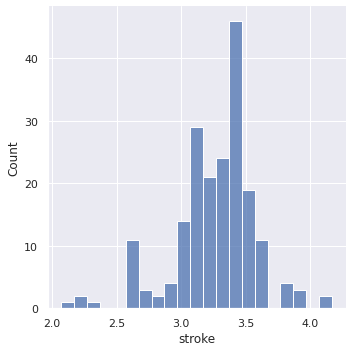

In [ ]:
sns.displot(df.stroke);

esta tiene una distribución más o menos normal, por lo que la mejor estrategia será reemplazar los valores nulos por la media. Si se tienen datos atípicos que afecten significativamente la media, lo mejor será reemplazar por la mediana. Si la variable es de tipo categórica, se puede pensar en reemplazar por el valor más frecuente en la variable.

Para reemplazar los valores faltantes con estrategias comunes, Sklearn proporciona el transformador `SimpleImputer`

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

Note que por defecto se utiliza la estrategia de llenado con la media de la característica (`strategy="mean"`)

In [ ]:
# reemplazamos los valores faltantes
df.stroke = imputer.fit_transform(df[["stroke"]])

# examinamos si hay valores faltantes
df.stroke.isna().any()

False

Se pueden utilizar otras estrategias más complejas donde se agrupen los datos de acuerdo a algunas características particulares, y a partir de estos grupos  reemplazar los valores nulos.

<p><a name="nor"></a></p>

# **Estandarización, escalamiento y normalización**

Algunas características, como por ejemplo la latitud o la longitud, tienen valores limitados, mientras que otras características numéricas, como las de conteo, pueden aumentar sin límite. 

Los modelos que son funciones suaves de la entrada, como la regresión lineal, o la regresión logística, se ven afectados por la escala de la entrada. Los modelos basados ​​en árboles, por otro lado, no les importa nada la escala de las características. Entonces, Si el modelo es sensible a la escala de las características de entrada, el escalamiento de estas podría ayudar en el rendimiento del modelo, en su estabilidad, y en la eficiencia computacional asociada a los procesos de entrenamiento y predicción





In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/diplomadomludea/nivel_1/master/data/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Antes de aplicar cualquier transformación de escala (en general cualquier transformación), es muy importante dividir los datos en los conjuntos de entrenamiento y prueba. Si escalamos los datos antes de este paso, el conjunto de prueba tendrá información del conjunto de entrenamiento, lo que añade un sesgo al modelo

In [ ]:
X = df[["ENGINESIZE", "FUELCONSUMPTION_CITY"]]
y = df[["CO2EMISSIONS"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Estandarización**

La estandarización es una transformación que centra los datos eliminando el valor medio de cada característica y luego la escala dividiendo las características (no constantes) por su desviación estándar. Después de estandarizar los datos, la media será cero y la desviación estándar uno.

\begin{equation}
x' = \frac{x-\mu}{\sigma}
\end{equation}






![](https://i.imgur.com/zFenksl.png)

La estandarización puede mejorar drásticamente el rendimiento de los modelos. Algunos modelos (por ejemplo SVM y Modelos lineales regularizados) asumen que todas las características se centran alrededor de cero y tienen una varianza del mismo orden. Si una característica tiene una escala o varianza que es órdenes de magnitud mayor que otras, podría dominar la función objetivo y hacer que el estimador no pueda aprender de otras características correctamente como se esperaba.

Podemos estandarizar nuestros datos con el transformador `StandarScaler` de Sklearn.

In [ ]:
from sklearn.preprocessing import StandardScaler

def LR(X, y, seed=42, scale=False):
  """
  muestra el resultado de un modelo de regresion lineal
  """
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
  model = LinearRegression()

  if scale:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    LR = model.fit(X_train_scaled, y_train)

    print(f"R2: {LR.score(X_test_scaled, y_test)}")
    print(f"w0: {LR.intercept_}")
    print(f"W: {LR.coef_}")

  else:
    LR = model.fit(X_train, y_train)

    print(f"R2: {LR.score(X_test, y_test)}")
    print(f"w0: {LR.intercept_}")
    print(f"W: {LR.coef_}")

In [ ]:
# sin estandarizacion
LR(X, y)

R2: 0.8714766559984765
w0: [81.7328305]
W: [[18.54175553  8.48132664]]


In [ ]:
 # con estandarizacion
LR(X, y, scale=True)

R2: 0.8650514365673871
w0: [257.25674091]
W: [[26.21575663 34.59970351]]


Además de mejorar el desempeño del modelo en términos computacionales, el proceso de estandarización nos permite tener una mejor interpretación del modelo: note cómo cambiaron los parámetros al estandarizar los datos. El resultado con estandarización es más confiable (desde el punto de vista de la interpretación)

**Normalización**

La normalización es el proceso de escalar muestras individuales para tener una norma unitaria. 

$$x' = \frac{x}{||x||}$$






![](https://i.imgur.com/ASvg1B0.png)

La normalizacion es una operación común para la clasificación o agrupamiento de datos donde es importante la distancia entre las diferentes instancias. Además, algunos modelos como el PCA, asumen invarianza rotacional, por lo que una norma $l_2$ será útil. 

Esta se puede implementar para varios tipos de norma ($l_1$, $l_2$ and $\text{max}$) utilizando la clase `Normalizer` de Sklearn

In [ ]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler

Normalizer(copy=True, norm='l2')

note que por defecto se usa la norma $l_2$

In [ ]:
scaler.fit_transform(X_train)

array([[0.16251626, 0.98670587],
       [0.28147357, 0.95956898],
       [0.25873609, 0.96594805],
       ...,
       [0.26210915, 0.96503823],
       [0.177153  , 0.98418332],
       [0.27343111, 0.96189159]])

**Escalamiento**

También podemos hacer que nuestros datos estén en un rango determinado ($a$,$\;b$)

\begin{equation}
x' = \frac{x-a}{b-a}
\end{equation}

Este escalador funciona mejor en casos en los que la distribución no es gaussiana o la desviación estándar es muy pequeña. Sin embargo, es sensible a valores atípicos, por lo que si hay valores atípicos en los datos, es mejor considerar otro escalador. 

Escalas drásticamente variables en las características de entrada pueden generar problemas de estabilidad para el algoritmo de entrenamiento del modelo. En esas situaciones, es una buena idea escalar los datos.

Podemos escalar los datos utilizando el transformador `MinMaxScaler` de Sklearn.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

note que por defecto se escala al rango (0,1)

In [ ]:
scaler.fit_transform(X_train)

array([[0.05405405, 0.14901961],
       [0.45945946, 0.40392157],
       [0.27027027, 0.25490196],
       ...,
       [0.45945946, 0.45098039],
       [0.10810811, 0.20784314],
       [0.62162162, 0.58823529]])

<p><a name="cat"></a></p>

# **Codificación de variables categóricas**

Algunos algoritmos solo reciben variables numéricas como entrada, por lo que necesitaremos transformar las variables categoricas a variables numericas para poder alimentar el algoritmo.

Supongamos que vamos a alimentar un algoritmo que solo toma variables numericas. Supongamos además que transformamos una variable categorica nominal mediante una codificacion ordinal. Puede pasar que el algoritmo le dé más peso a un valor particular de acuerdo al valor numérico que se le ha asignado con la codificacion ordinal, pero este valor en realidad no tiene nada que ver con ese ordenamiento con el cual se hizo la codificacion ordinal. Por lo que la mejor opción sería realizar una codificación nominal para evitar este tipo de comportamiento del algoritmo. O en el caso contrario, si realizamos una codificación nominal a una variable categorica ordinal, podríamos perder capacidad de predicción ya que el algoritmo no es capaz de acceder a esa información ordinal intrinseca de la variable.

Sin embargo, el esquema de codificación a utilizar en cada caso se resuelve experimentalmente. Es decir, más allá de las buenas prácticas que podamos seguir, vamos a encontrar casos en el que estas prácticas o el sentido común no son garantía para obtener el mejor rendimiento posible, y la última palabra para saber qué tipo de codificiación utilizar la dará el rendimiento del algoritmo.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/diplomadomludea/nivel_1/master/data/auto.csv", index_col=[0])
df.dropna(inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

**Codificación Ordinal**

Comencemos por la codificacion de las variables categoricas ordinales. La codificación ordinal la podemos implementar mediante los transformadores `LabelEncoder` o `OrdinalEncoder`de Sklearn. Transformemos la característica `num-of-cylinders`

In [ ]:
df["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'eight'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

le = LabelEncoder()
oe = OrdinalEncoder()

In [ ]:
# retorna un arreglo unidimensional
le.fit_transform(df["num-of-cylinders"])[:5]

array([2, 2, 3, 2, 1])

In [ ]:
# retorna un arreglo bidimensional
oe.fit_transform(df[["num-of-cylinders"]])[:5]

array([[2.],
       [2.],
       [3.],
       [2.],
       [1.]])

Veamos cómo se realizó la codificación

In [ ]:
df["num-of-cylinders-num"] = le.fit_transform(df["num-of-cylinders"])

df[["num-of-cylinders","num-of-cylinders-num"]].sort_values(by=["num-of-cylinders-num"]).drop_duplicates()

,num-of-cylinders,num-of-cylinders-num
70,eight,0
67,five,1
137,four,2
13,six,3
17,three,4


Note que la codificación no se hace en el orden esperado. Esto es debido a que no se ha hecho explícita la naturaleza de la variable. Podemos convertir la característica a una variable categórica con la función `Categorical` de Pandas, donde podemos especificar si la variables es ordinal y cual es el orden de las categorías

In [ ]:
df["num-of-cylinders-num"] = pd.Categorical(df["num-of-cylinders"], ordered=True, categories=["three","four","five","six","eight"])
df["num-of-cylinders-num"]

0      four
1      four
2       six
3      four
4      five
       ... 
196    four
197    four
198     six
199     six
200    four
Name: num-of-cylinders-num, Length: 196, dtype: category
Categories (5, object): ['three' < 'four' < 'five' < 'six' < 'eight']

con el atributo de acceso `cat` podemos obtener una etiqueta asociada a cada categoria con el atributo `codes`

In [ ]:
df["num-of-cylinders-num"] = df["num-of-cylinders-num"].cat.codes
df["num-of-cylinders-num"]

0      1
1      1
2      3
3      1
4      2
      ..
196    1
197    1
198    3
199    3
200    1
Name: num-of-cylinders-num, Length: 196, dtype: int8

In [ ]:
df[["num-of-cylinders","num-of-cylinders-num"]].sort_values(by=["num-of-cylinders-num"]).drop_duplicates()

,num-of-cylinders,num-of-cylinders-num
17,three,0
0,four,1
187,five,2
13,six,3
70,eight,4


Alternativamente podemos utilizar un mapeo directamente 

In [ ]:
mapping = {"two":2, "three":3, "four":4, "five":5, "six":6, "eight":8, "twelve":12}

df["num-of-cylinders-num"] = df["num-of-cylinders"].replace(mapping)

In [ ]:
df[["num-of-cylinders","num-of-cylinders-num"]].drop_duplicates()

,num-of-cylinders,num-of-cylinders-num
0,four,4
2,six,6
4,five,5
17,three,3
68,eight,8


**One-Hot Encoding**

Para las variables categoricas nominales usaremos otro tipo de codificación, conocida como *one-hot encoding*. Esencialmente, cada característica categórica con $n$ categorías se transforma en $n$ características binarias (o variables *dummy*). 

Esta codificación se puede implementar mediante el transformador `OneHotEncoder` de Sklearn. Transformemos la característica `drive-wheels` con este esquema de codificación

In [ ]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
ohe.fit_transform(df[["drive-wheels"]])

<196x3 sparse matrix of type '<class 'numpy.float64'>'
	with 196 stored elements in Compressed Sparse Row format>

Note que por defecto se retorna una matriz *dispersa* (sparse), en la cual no se utiliza espacio en memoria para almacenar todos los ceros que aparecen en este esquema de codificación. Sin embargo los métodos y funcionalidades de Sklearn, por ejemplo para construir modelos, aceptan este tipo de matrices. Ahora, si queremos visualizar el resultado, utilizamos el kwarg `sparse`

In [ ]:
ohe = OneHotEncoder(sparse=False)

ohe.fit_transform(df[["drive-wheels"]])[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

como se había mencionado, las $n$ (tres) categorias ('rwd', 'fwd' y '4wd') se codificaron en $n$ (tres) características. Siempre es posible eliminar una de las características (y quedarnos con $2n - 1$ características), ya que contiene información redundante. Podemos eliminar esa columna adicional utilizando el kwarg `drop`

In [ ]:
ohe = OneHotEncoder(sparse=False, drop="first")

ohe.fit_transform(df[["drive-wheels"]])[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.]])

Esta codificación también la podemos implementar con Pandas mediante el método `get_dummies`:

In [ ]:
pd.get_dummies(df[["drive-wheels"]], drop_first=True)

,drive-wheels_fwd,drive-wheels_rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0
...,...,...
196,0,1
197,0,1
198,0,1
199,0,1
